# Comp3115 Group J Sorce Code

In [42]:
# Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import requests
from tqdm import tqdm # for making progress bar
from time import gmtime, strftime, time
import urllib.parse
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

## Task 1

### Step 1

In [ ]:
# Task 1

## Task 2

### Step 1

In [ ]:
# Task 2

## Task 3

### Step 1

In [ ]:
# Task 3

## Task 4: Possible factors that affect death rate

### Data fetching

In [4]:
def generateAPILinks(file_url = 'http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv', start = '20200101', end = strftime('%Y%m%d', gmtime(time() - 3600 * 24))):
  response = requests.get(f'https://api.data.gov.hk/v1/historical-archive/list-file-versions?url={urllib.parse.quote_plus(file_url)}&start={start}&end={end}')
  json = response.json()
  return [f'https://api.data.gov.hk/v1/historical-archive/get-file?url={urllib.parse.quote_plus(file_url)}&time=' + t for t in json['timestamps']]

enhanced_sur_covid_19_urls = generateAPILinks('http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv')

enhanced_sur_covid_19_df = pd.DataFrame()
for u in tqdm(enhanced_sur_covid_19_urls):
  enhanced_sur_covid_19_df = pd.concat([enhanced_sur_covid_19_df, pd.read_csv(u, index_col=0)])
enhanced_sur_covid_19_df.to_csv('enhanced_sur_covid_19_eng.csv')

100%|█████████████████████████████████████████| 698/698 [11:22<00:00,  1.02it/s]


### Data cleaning

In [5]:
# Import dataframe
enhanced_sur_covid_19_df = pd.read_csv('enhanced_sur_covid_19_eng.csv',index_col=0)

# Data Cleaning
enhanced_sur_covid_19_df.drop(enhanced_sur_covid_19_df.iloc[:, [
                              1, 10, 11, 12]], axis=1, inplace=True)
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Hospitalised/Discharged/Deceased'].isin(['Discharged', 'Deceased'])]
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['HK/Non-HK resident'].isin(['HK resident', 'Non-HK resident'])]
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Report date'] != '16/0了7/2020']
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Date of onset'].str.contains('/') == True]
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Age'] != '1 month']
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Age'] != '<1']

# Export
enhanced_sur_covid_19_df.to_csv('enhanced_sur_covid_19_eng_clean.csv')

/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,4,5,8,9,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Simple Visual

/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


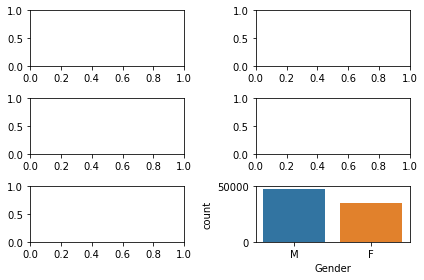

In [53]:
# Import dataframe
df = pd.read_csv('enhanced_sur_covid_19_eng_clean.csv', index_col=0)

# Filtering
death = df[df['Hospitalised/Discharged/Deceased'] == 'Deceased']
discharge = df[df['Hospitalised/Discharged/Deceased'] == 'Discharged']

# Simple Visual
# sns.countplot(data=death,x='Age')
# plt.figure()
# sns.countplot(data=death,x='Gender')
# plt.figure()
# sns.countplot(data=death,x='HK/Non-HK resident')
# plt.figure()
# sns.countplot(data=discharge,x='Age')
# plt.figure()
# sns.countplot(data=discharge,x='Gender')
# plt.figure()
# sns.countplot(data=discharge,x='HK/Non-HK resident')
# plt.figure()